<a href="https://colab.research.google.com/github/yonas8989/wheat_crop_production_ml/blob/main/Yet_another_copy_of_production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import require version of pyton and other


In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download the Data
from kagle.com


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load a DataFrame with a specific version of a CSV
agriculture_data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shaikasif89/wheat-yeild/versions/1",
    "mock_india_data_200k.csv",
)

100%|██████████| 69.1M/69.1M [00:01<00:00, 65.6MB/s]


In [ ]:
agriculture_data.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,31.659157,72.341565,44.072192,29.264916,0.356576,17.301551,0.765369,0.199313,1.552217,0.668593,...,1,912.060983,39.777421,24.213226,3.944768,349.381090,8.316536,0.160536,262,40.726244
1,24.552223,83.651481,33.811489,29.188423,0.406334,16.531581,0.782977,4.887975,1.749305,0.414971,...,0,1007.507349,35.063534,15.784410,6.667556,325.937464,6.852431,0.355840,103,33.169983
2,25.053288,72.861068,22.020405,12.163084,0.813958,18.337718,0.640384,4.381282,2.608996,0.086226,...,1,961.956996,46.148747,23.440943,3.062181,43.366895,9.812069,0.699876,351,95.409052
3,36.091315,72.719879,41.994364,28.916630,0.751695,17.915672,0.357538,0.520668,1.723544,0.645409,...,0,1019.797592,37.158386,24.796908,6.747123,333.584649,13.711991,0.628048,335,75.927453
4,18.960587,79.651551,35.074907,12.321231,0.675791,12.468106,0.494761,1.714945,3.272974,0.005980,...,1,948.058799,42.258091,24.457688,2.381484,111.257948,6.111509,0.051079,69,24.278898


In [ ]:
agriculture_data.describe()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,22.477387,82.511188,32.498709,20.007869,0.500812,17.496816,0.649162,2.502638,2.493019,0.500698,...,0.49871,974.839558,37.503852,17.503459,5.513945,180.192867,7.502625,0.500109,182.128650,60.120722
std,8.369017,8.359161,7.198028,5.770943,0.288576,4.329797,0.201943,1.439704,1.440942,0.288785,...,0.50000,43.326799,7.216448,4.326156,2.598213,103.841526,4.329213,0.288679,105.476299,23.083178
min,8.000068,68.000020,20.000007,10.000216,0.000010,10.000035,0.300002,0.000054,0.000028,0.000033,...,0.00000,900.001013,25.000016,10.000099,1.000126,0.001719,0.000117,0.000003,0.000000,20.000569
25%,15.216047,75.280052,26.276031,15.028456,0.251240,13.736282,0.474415,1.261113,1.245206,0.250143,...,0.00000,937.275968,31.235225,13.763904,3.271270,90.266166,3.752884,0.250360,91.000000,40.113672
50%,22.485451,82.538473,32.500039,19.992886,0.500629,17.505235,0.648595,2.503443,2.487952,0.501144,...,0.00000,974.745741,37.527912,17.513862,5.515565,180.211757,7.499742,0.500438,182.000000,60.157944
75%,29.715143,89.718761,38.726467,24.986128,0.750860,21.239095,0.823866,3.746219,3.737596,0.751019,...,1.00000,1012.381076,43.755902,21.239794,7.766305,270.053158,11.246734,0.750532,273.000000,80.144426
max,36.999972,96.999965,44.999977,29.999763,0.999994,24.999926,0.999999,4.999981,4.999962,0.999991,...,1.00000,1049.998105,49.999993,24.999985,9.999976,359.998418,14.999899,0.999995,364.000000,99.999444


In [ ]:
# Check for zero or negative values in the Yield column
if (agriculture_data['Yield'] <= 0).any():
    raise ValueError("The Yield column contains zero or negative values, which cannot be transformed using the logarithm.")

# Apply logarithmic transformation
agriculture_data['Yield'] = np.log(agriculture_data['Yield'])

As we can see the data is fully completed for each row


# Visualize

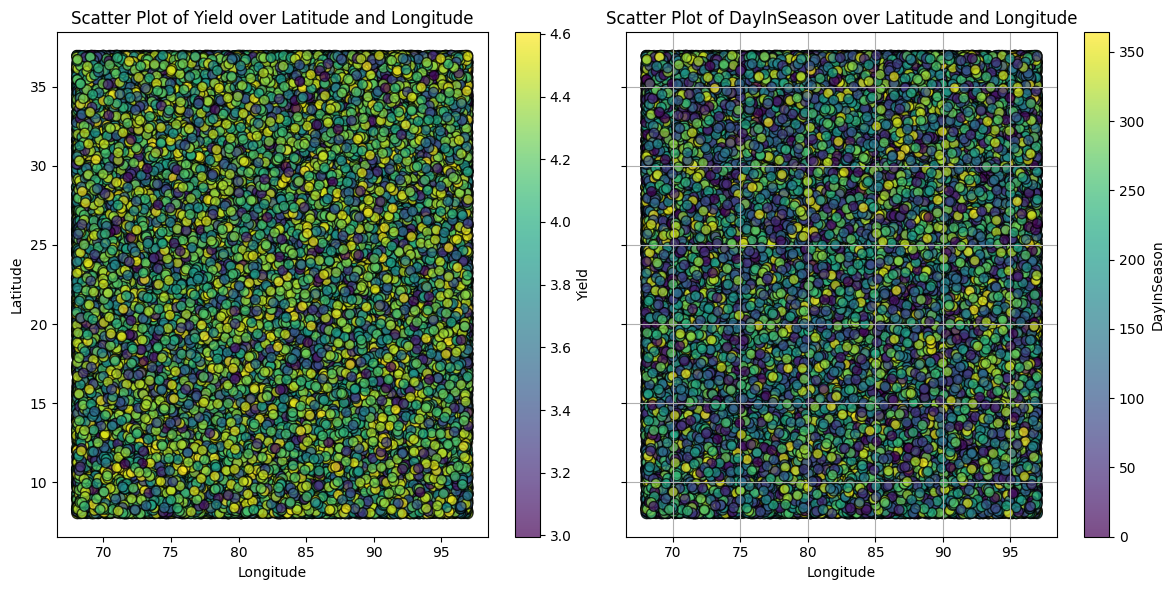

In [ ]:
# Create the scatter plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# First scatter plot: Latitude vs Yield
sc1= axes[0].scatter(agriculture_data["Longitude"], agriculture_data["Latitude"], c=agriculture_data['Yield'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
axes[0].set_title('Scatter Plot of Yield over Latitude and Longitude')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
cbar1 = fig.colorbar(sc1, ax=axes[0], orientation='vertical')
cbar1.set_label('Yield')

# Second scatter plot: Longitude vs Yield
sc2= axes[1].scatter(agriculture_data["Longitude"], agriculture_data["Latitude"], c=agriculture_data['DayInSeason'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
axes[1].set_title('Scatter Plot of DayInSeason over Latitude and Longitude')
axes[1].set_xlabel('Longitude')
cbar2 = fig.colorbar(sc2, ax=axes[1], orientation='vertical')
cbar2.set_label('DayInSeason')

plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
#agriculture_data[agriculture_data.duplicated(subset=['Latitude', 'Longitude'], keep=False)]

# Define the target latitude and longitude
target_latitude = 31.659157  # Replace with the desired latitude
target_longitude = 72.341565  # Replace with the desired longitude
tolerance = 0.5  # Define the proximity tolerance for latitude and longitude

# Filter rows based on latitude and longitude
filtered_rows = agriculture_data[
    (agriculture_data["Latitude"].between(target_latitude - tolerance, target_latitude + tolerance)) &
    (agriculture_data["Longitude"].between(target_longitude - tolerance, target_longitude + tolerance))
]

# Display the result
#print(filtered_rows)

# Sort the filtered DataFrame by DayInSeason
df_sorted = filtered_rows.sort_values(by='DayInSeason')

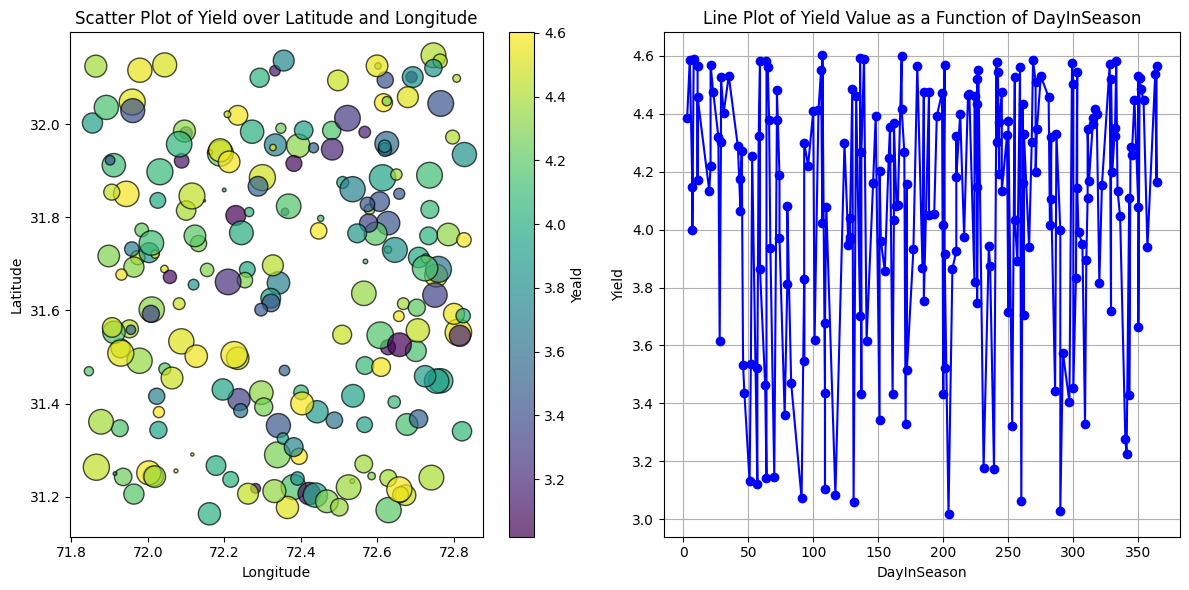

In [ ]:
#plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot: Latitude vs Yield
s= axes[0].scatter(filtered_rows["Longitude"], filtered_rows["Latitude"], c=filtered_rows['Yield'], s =filtered_rows['DayInSeason'],   cmap='viridis', edgecolor='k', alpha=0.7)
axes[0].set_title('Scatter Plot of Yield over Latitude and Longitude')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
cbar1 = fig.colorbar(s, ax=axes[0], orientation='vertical')
cbar1.set_label('Yeald')

# Second plot: DayInSeason vs Yield
l= axes[1].plot(df_sorted['DayInSeason'], df_sorted['Yield'], marker='o', linestyle='-', color='b')
axes[1].set_title('Line Plot of Yield Value as a Function of DayInSeason')
axes[1].set_xlabel('DayInSeason')
axes[1].set_ylabel('Yield')

plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Check for repeated latitude and longitude rows
duplicated_rows = agriculture_data[agriculture_data.duplicated(subset=['Latitude', 'Longitude'], keep=False)]

# Display the duplicated rows
if not duplicated_rows.empty:
    print("Repeated latitude and longitude rows:")
    print(duplicated_rows)
else:
    print("No repeated latitude and longitude rows found.")

No repeated latitude and longitude rows found.


In [ ]:
# Check for repeated DayInSeason rows
duplicated_rows = agriculture_data[agriculture_data["DayInSeason"].duplicated()]

# Display the duplicated rows
if not duplicated_rows.empty:
    print("Repeated DayInSeason rows:")
    print(duplicated_rows.sort_values(by="DayInSeason"))
else:
    print("No repeated DayInSeason rows found.")

Repeated DayInSeason rows:
         Latitude  Longitude  apparentTemperatureMax  apparentTemperatureMin  \
130485  15.547590  82.604676               30.422638               15.576266   
12418   17.131071  70.211332               39.882818               20.590389   
26480   34.551169  92.060362               24.872182               22.386068   
49841   25.098504  75.235071               42.659115               25.105444   
7385    15.963515  88.983631               29.432993               25.848470   
...           ...        ...                     ...                     ...   
27583   21.629632  71.654664               32.392118               13.394863   
115980  12.567121  89.572258               33.826073               18.130680   
112093  32.386118  75.589094               39.815712               15.645357   
110348  11.695069  72.813647               38.914015               29.052733   
79212   14.410604  95.091545               39.488630               17.149533   

        clou

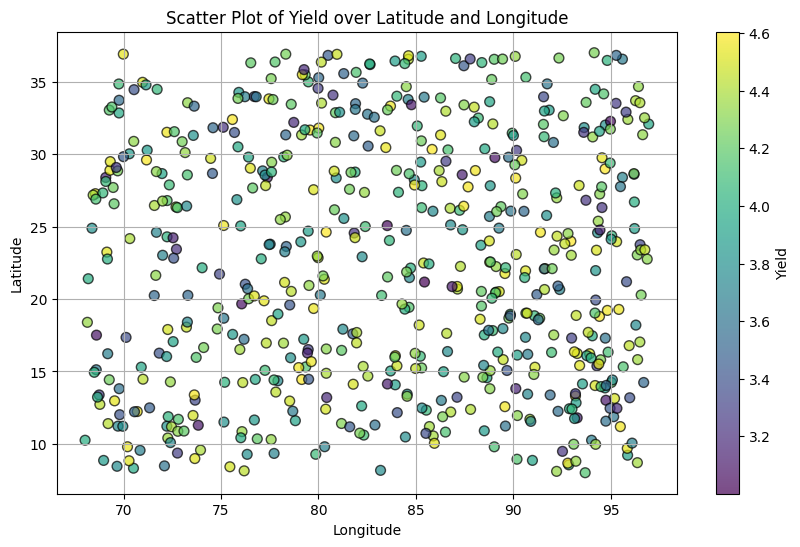

In [ ]:
# Filter rows based on DayInSeason
# Define the specific value to filter
specific_value = 364.0  # Replace with the desired value
tolerance = 1e-6  # Define a small tolerance for floating-point comparisons

# Filter rows where z is approximately equal to the specific value
filtered_df = agriculture_data[abs(agriculture_data['DayInSeason'] - specific_value) <= tolerance]
#print(filtered_df)

#plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_df["Longitude"], filtered_df["Latitude"], c=filtered_df['Yield'], cmap='viridis', s=50, edgecolor='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Yield')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Yield over Latitude and Longitude')
plt.grid(True)
plt.show()

In [ ]:
#filtered_df.describe()

🧑 only three columns are numeric so that only this column have mean , std , min qurtile and and other as you can see above


['apparentTemperatureMax', 'apparentTemperatureMin', 'cloudCover', 'dewPoint', 'humidity', 'precipIntensity', 'precipIntensityMax', 'precipProbability', 'precipAccumulation', 'precipTypeIsRain', 'precipTypeIsSnow', 'precipTypeIsOther', 'pressure', 'temperatureMax', 'temperatureMin', 'visibility', 'windBearing', 'windSpeed', 'NDVI', 'DayInSeason', 'Yield']


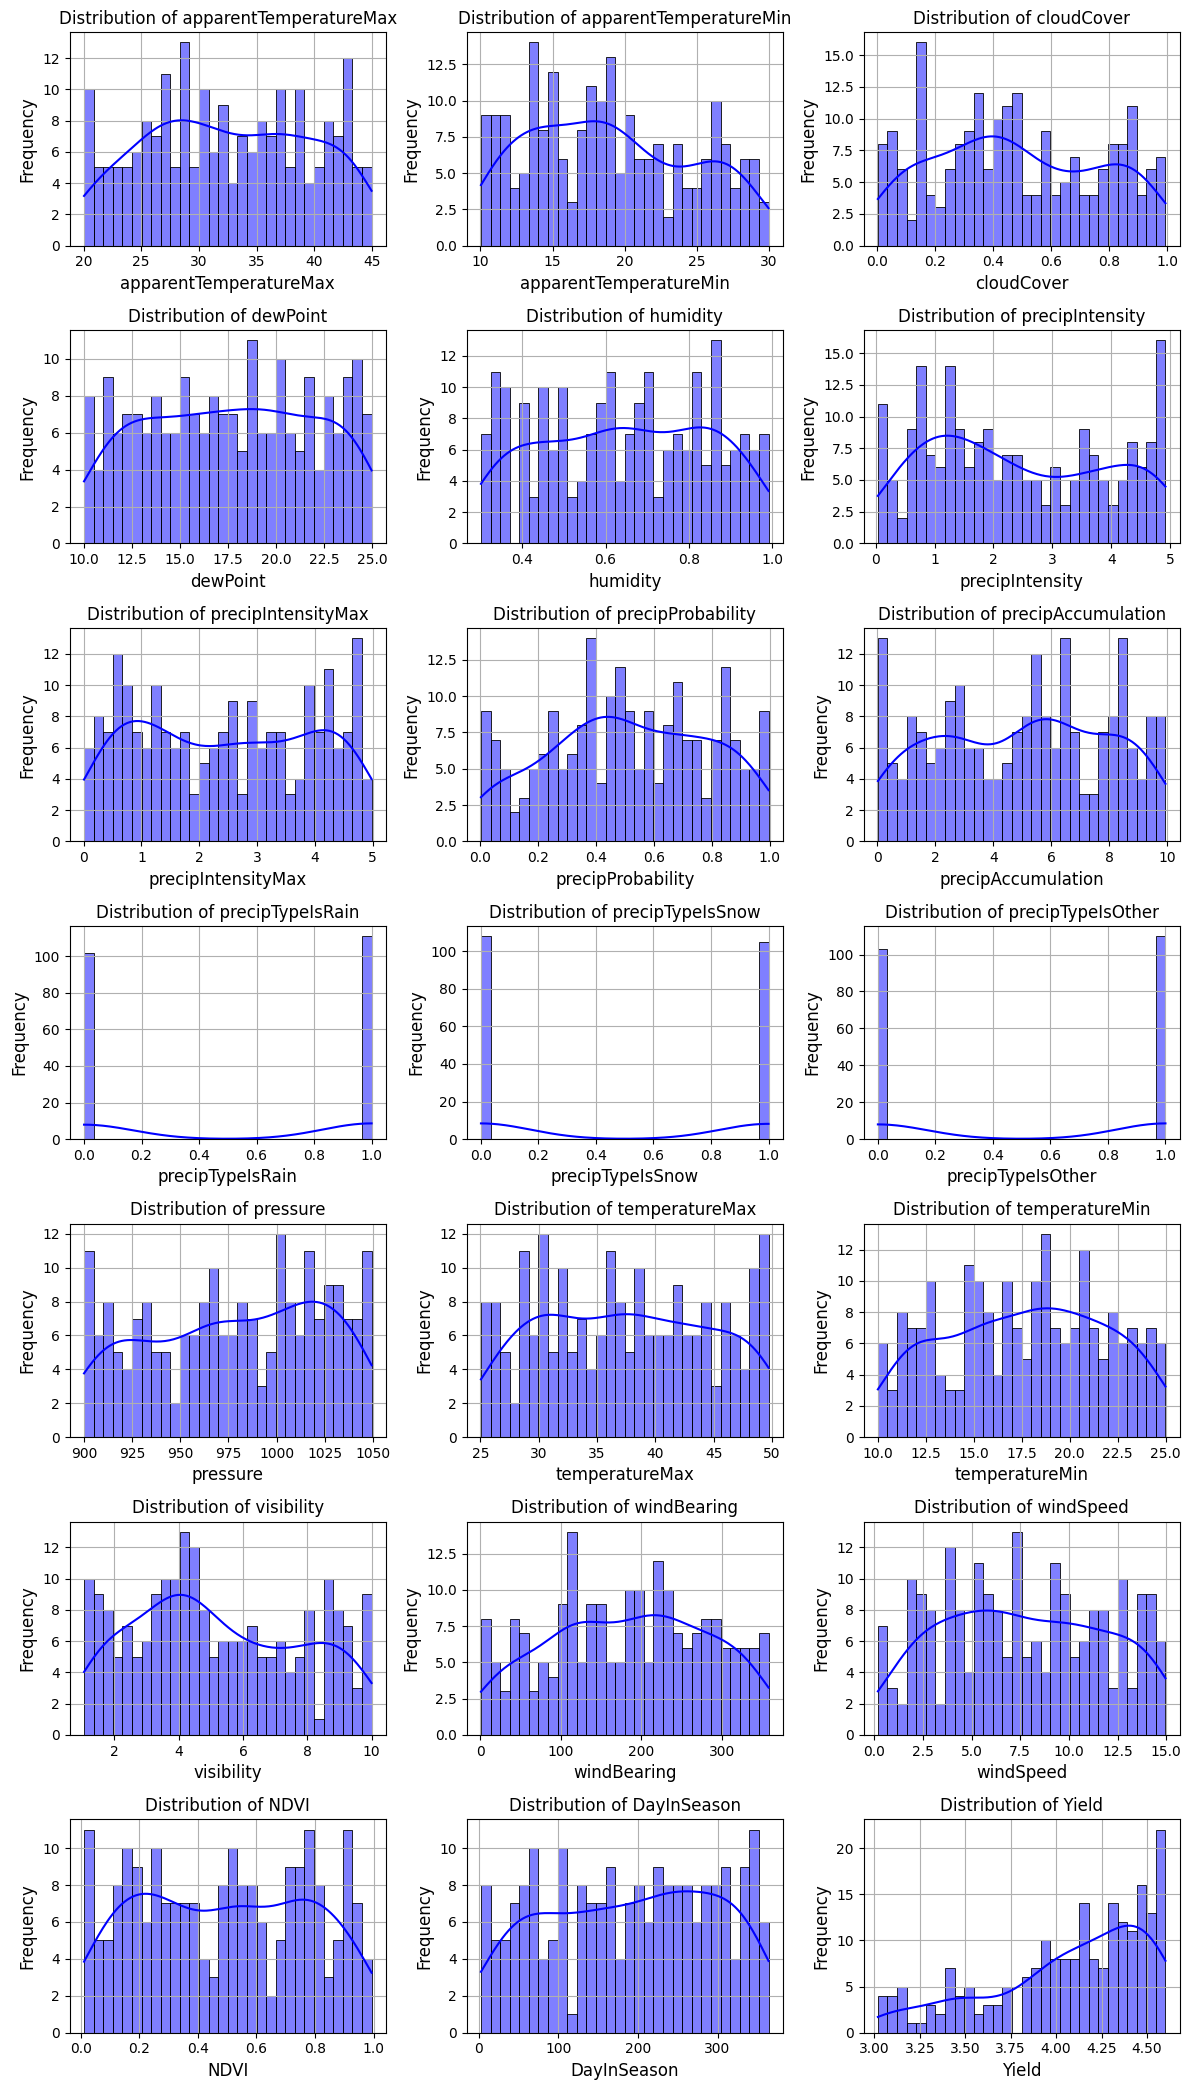

In [ ]:
import math
numerical_columns = filtered_rows.columns[2:].tolist()  # Adjust column names as needed
print(numerical_columns)
def plot_feature_distributions(data, features):

    cols = 3  # Number of columns for subplots
    rows = math.ceil(len(features) / cols) # Calculate rows dynamically
    fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))
    axes = axes.flatten()  # Flatten for easy indexing

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, bins=30, color="blue", ax=axes[i])
        axes[i].set_title(f"Distribution of {feature}", fontsize=12)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].grid(True)

    # Hide unused subplots
    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Plot distributions for the numerical columns
plot_feature_distributions(filtered_rows, numerical_columns)

# Correlation

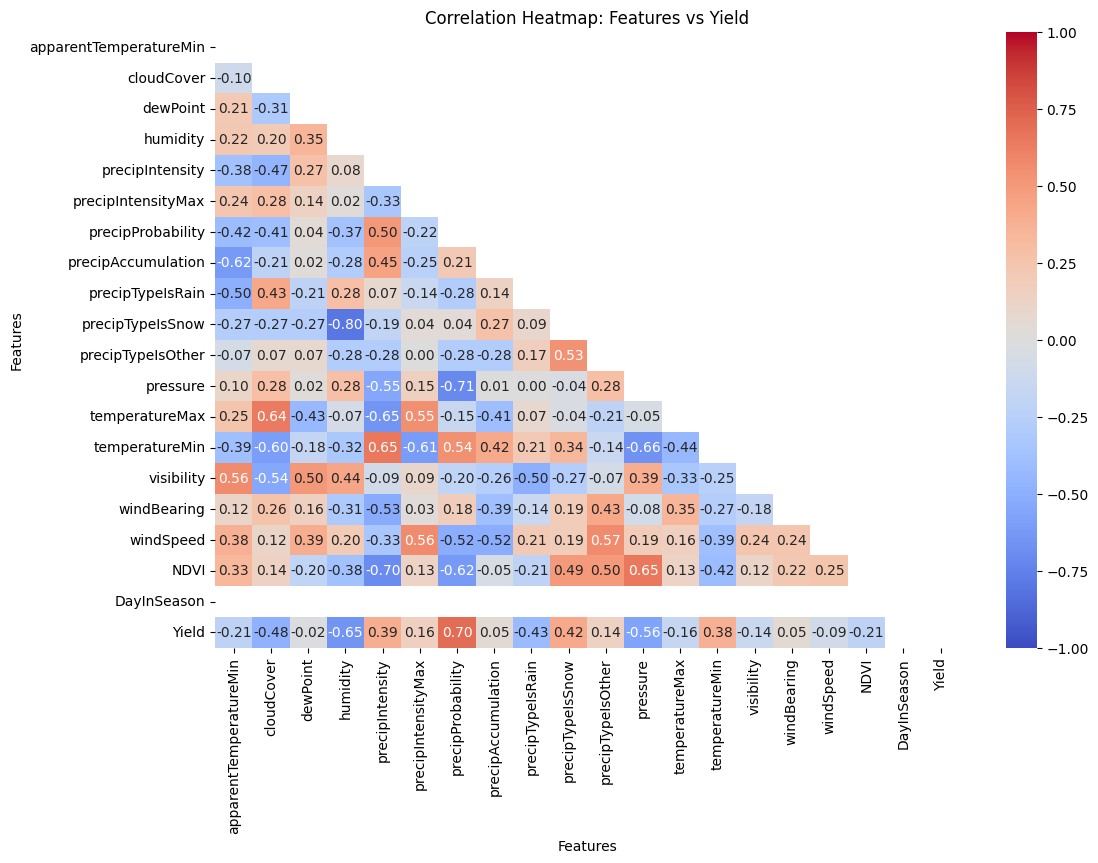

In [ ]:
# Remove the location (Longitude and Latitude) cols and create a new data frame
#agriculture_data_df = agriculture_data.iloc[:,2:]
#print(agriculture_data_df.head())

target_latitude = 22.5
target_longitude = 82.5
tolerance = 2
# Filter rows based on latitude and longitude
filtered_rows = agriculture_data[
    (agriculture_data["Latitude"].between(target_latitude - tolerance, target_latitude + tolerance)) &
    (agriculture_data["Longitude"].between(target_longitude - tolerance, target_longitude + tolerance))
]
specific_value = 354.0  # Replace with the desired value
filtered_df = filtered_rows[abs(filtered_rows['DayInSeason'] - specific_value) <= 0]
#Calculate the correlation matrix between all features and 'Yield'
correlation_matrix = filtered_df.iloc[:,3:].corr(method='spearman')

# Create a heatmap to visualize the correlation between features and 'Yield'
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(correlation_matrix[['Yield']].sort_values(by='Yield', ascending=False),annot=True, cmap='coolwarm', vmin=-1, vmax=1)


# Adding labels and title
plt.title('Correlation Heatmap: Features vs Yield')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

The correlation analysis focuses on a specific geographic area within a 1-degree radius and is conducted for a particular day of the season. This approach allows for localized insights into the relationship between the variables under study.

However, when extending the analysis to different days or adjusting the area size—either expanding beyond the 1-degree radius or narrowing it further—you may observe significant variations in the Spearman correlation values. These variations highlight the dynamic nature of the relationships between the variables, which can be influenced by temporal changes (day-to-day differences) and spatial factors (area size and location).



=================================================================================================================

# create a Test set


in next code block we divide the data set in to test set and trainning test

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

we divide 20% for test and 80% for training

In [ ]:
train_set, test_set = shuffle_and_split_data(agriculture_data, 0.2)
len(train_set)

160000

In [ ]:
len(test_set)

40000

# Discover and visualize the data to gain insights
but first we copy the training set

In [ ]:
agriculture_data = train_set.copy()

# visualizing Geographical Data

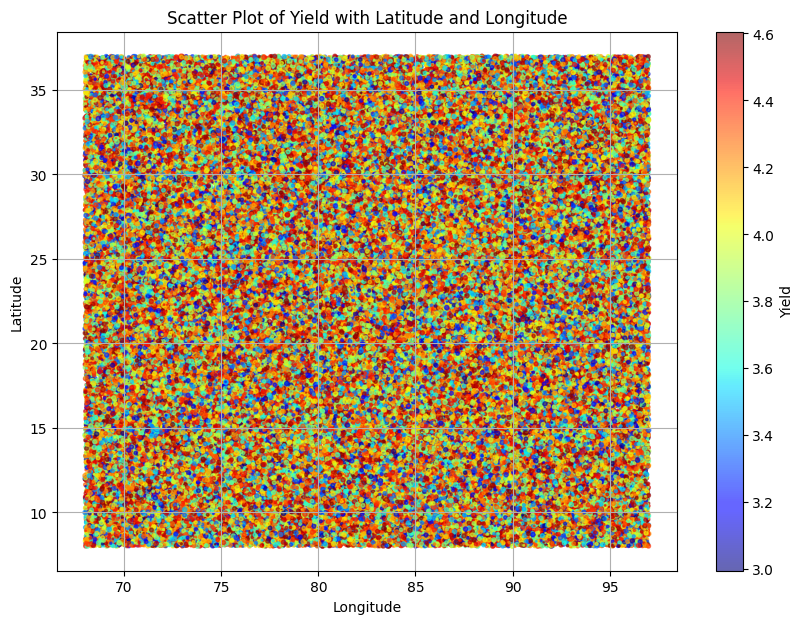

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot to visualize yield based on latitude and longitude
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=agriculture_data["Longitude"],
    y=agriculture_data["Latitude"],
    c=agriculture_data["Yield"],  # Color by yield
    s=agriculture_data["NDVI"] * 10,  # Size of points proportional to NDVI
    cmap="jet",  # Color map for yield
    alpha=0.6,  # Transparency
)
plt.colorbar(scatter, label="Yield")  # Add color bar
plt.grid(True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Yield with Latitude and Longitude")

# Save the plot
plt.savefig("yield_scatterplot.png", dpi=300)
plt.show()


# Prepare the data for Machine Learning algorism


In [ ]:
agriculture_labels = train_set["Yield"].copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Define preprocessing (example: standard scaling)
preprocessing = StandardScaler()






Random Forest RMSE scores: [1.30753950e-05 1.32744823e-05 1.34650163e-05 1.35309952e-05
 1.35578012e-05 1.34429854e-05 1.33139675e-05 1.33231880e-05
 1.36823307e-05 1.32616633e-05]
Mean RMSE: 1.3392782493679332e-05


In [ ]:

# Define the pipeline with preprocessing and RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# Perform cross-validation to compute RMSE scores
forest_rmses = -cross_val_score(
    forest_reg,
    agriculture_data,
    agriculture_labels,
    scoring="neg_root_mean_squared_error",
    cv=10
)

In [ ]:
# Print the RMSE scores
print("Random Forest RMSE scores:", forest_rmses)
print("Mean RMSE:", forest_rmses.mean())

Random Forest RMSE scores: [1.30753950e-05 1.32744823e-05 1.34650163e-05 1.35309952e-05
 1.35578012e-05 1.34429854e-05 1.33139675e-05 1.33231880e-05
 1.36823307e-05 1.32616633e-05]
Mean RMSE: 1.3392782493679332e-05